# GROUP 1 Storytelling with Data Presentation
Members: Khandaker Hridika, Jose Monroy, Michelle Pang, Shahram Rahman

The data sources used were from the Visual Crossing Weather Documentation website and the NYPD Citywide Crime Stats website for the year 2019. We chose 2019 to eliminate pandemic variations and outliers.

NYPD CRIME STAT DATA:
https://www1.nyc.gov/site/nypd/stats/crime-statistics/citywide-crime-stats.page

WEATHER DATA: 
https://www.visualcrossing.com/weather/weather-data-services#
(account was created to request and download data for the year of 2019)

Big Idea: As temperatures increase, rate of violent crimes increase as well. Non-violent crimes were also found to be at peak in colder weather months. 

In [1]:
#import necessary libraries
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta, date
import seaborn as sns

# GRAPHIC 1 -- Average Temperature per Month
Line graph shows that summer months (June-August) prove to have the highest temperatures and winter months (December to January have the lowest. 

In [2]:
#open temperature csv file
temp_data = pd.read_csv("2019 cleaned data.csv")

#month lists with daily temperatures for each month
jan = []
feb = [] 
mar= []
apr= []
may= []
jun= []
jul= []
aug= []
sept= []
octo= []
nov= []
dec= []
for j in temp_data['temp'][0:30]:
    jan.append(j)
for f in temp_data['temp'][31:59]:
    feb.append(f)
for m in temp_data['temp'][59:90]:
    mar.append(m)
for a in temp_data['temp'][90:120]:
    apr.append(a)
for ma in temp_data['temp'][120:151]:
    may.append(ma)
for june in temp_data['temp'][151:181]:
    jun.append(june)
for ju in temp_data['temp'][181:212]:
    jul.append(ju)
for ag in temp_data['temp'][212:243]:
    aug.append(ag)
for s in temp_data['temp'][243:273]:
    sept.append(s)
for o in temp_data['temp'][273:304]:
    octo.append(o)
for n in temp_data['temp'][304:334]:
    nov.append(n)
for d in temp_data['temp'][334:]:
    dec.append(d)
months = [jan, feb, mar, apr, may, jun, jul, aug, sept, octo, nov, dec]

#computing the average temperature for the 12 months of the year
averages = []
for month in months:
    total = 0
    for day in month:
        total+=day
    avg = format(total/len(month), '.2f')
    averages.append(float(avg))
print(averages)

[33.81, 35.98, 41.33, 54.47, 61.69, 71.93, 79.88, 75.46, 70.61, 60.07, 44.13, 38.61]


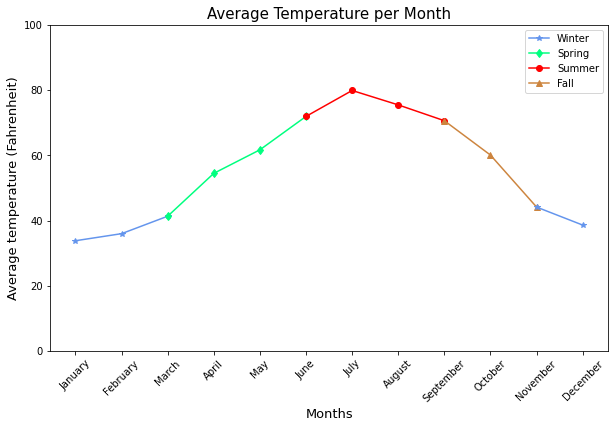

In [3]:
#GRAPHIC CREATION

#formatting details
plt.xlabel('Months', fontsize = 13)
plt.ylabel('Average temperature (Fahrenheit)', fontsize = 13)
plt.title("Average Temperature per Month", fontsize = 15)
plt.ylim([0, 100])
plt.xticks(rotation = '45')
plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches(10,6)

#labels 
x = ['January', 'February', 'March']
y = ['March', 'April', 'May', 'June']
z= ['June', 'July', 'August', 'September']
d = ["November", 'December']
a= ['September', 'October', 'November'] 

#average temperature per season
jan_feb = [33.81, 35.98, 41.33] #winter
mar_may = [41.33, 54.47, 61.69, 71.93] #spring
jun_aug = [71.93, 79.88, 75.46, 70.61] #summer
sep_nov = [70.61, 60.07, 44.13] #fall
nov_dec = [44.13, 38.61] #winter
labels = [x,y,z,d,a]

#plots with markers and colors
plt.plot(x, jan_feb, marker = "*", color = 'cornflowerblue')
plt.plot(y, mar_may, marker = "d", color = 'springgreen')
plt.plot(z, jun_aug, marker = "o", color= 'red')
plt.plot(a, sep_nov, marker = '^', color = 'peru')
plt.plot(d, nov_dec, marker = '*', color = 'cornflowerblue')

plt.legend(['Winter', 'Spring', 'Summer', 'Fall'])

plt.savefig('avg temp per month.png', bbox_inches="tight")
plt.show()

# GRAPHIC 2 -- Average Temperature per Season
Line graphs shows temperatures rise in the spring, peak in the summer and decline in the winter.

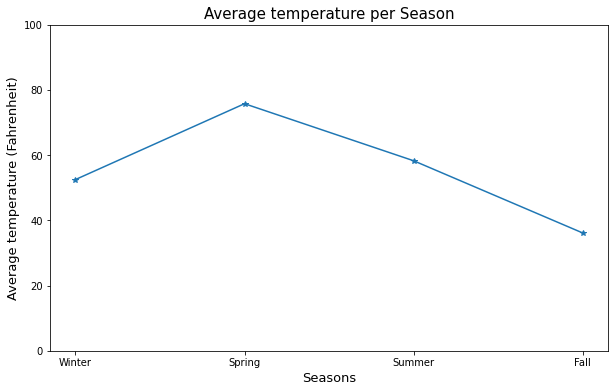

In [4]:
#labels
seasons = ['Winter', 'Spring', 'Summer', 'Fall']
#winter = december - feb 
#spring = march - may
#fall = sept - nov
#summer = jun - august

#calculating average temperatures per season
winter = format((averages[0]+averages[1]+averages[11])/3, '.2f')
spring = format((averages[2]+averages[3]+averages[4])/3, '.2f')
fall = format((averages[8]+averages[9]+averages[10])/3, '.2f')
summer = format((averages[5]+averages[6]+averages[7])/3, '2f')

season_temp = [float(spring), float(summer), float(fall), float(winter)]

#plotting the graph
plt.plot(seasons, season_temp, marker = '*')

#formatting
plt.ylim([0, 100])
plt.xlabel('Seasons', fontsize = 13)
plt.ylabel('Average temperature (Fahrenheit)', fontsize = 13)
plt.title('Average temperature per Season', fontsize = 15)
plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches(10,6)


plt.savefig('avg temp per szn.png')
plt.show()

# GRAPHIC 3 -- Top 10 Offenses of 2019
Bar graph shows the top 10 most committed offenses of 2019 in NYC. Of the 10, four were violent and six were non-violent. 

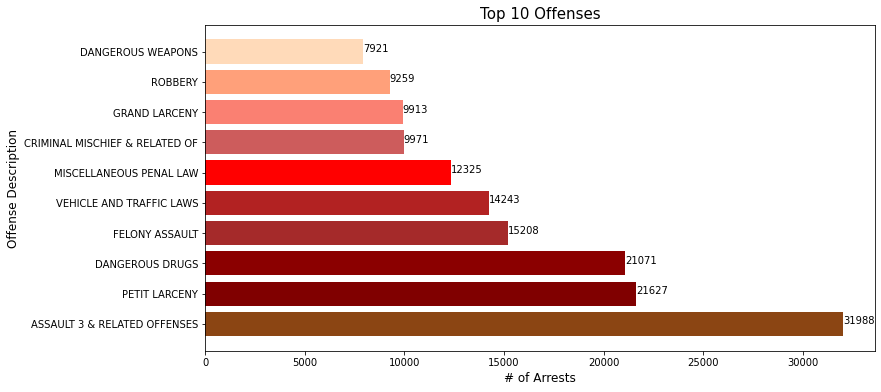

In [5]:
#read arrest data
crime = pd.read_csv("NYPD_ARRESTS_FINAL.csv")

#create list of offenses and number of crimes committed per offense
crime_count = crime["OFNS_DESC"].value_counts()
crime_counts = []
for x in crime_count:
    crime_counts.append(int(x))

values = crime['OFNS_DESC'].value_counts().index.tolist()

#function to add label value labels to bars
def add_value_label(x,y):
    for i in range(1, len(x)+1):
        plt.text(y[i-1],i-1, y[i-1])

#create horizontal bar chart
plt.barh(values[0:10], crime_counts[0:10], color = ['saddlebrown', 'maroon','darkred','brown','firebrick','red','indianred','salmon','lightsalmon','peachpuff'])
add_value_label(values[0:10],crime_counts[0:10])

#formatting
plt.xticks(rotation = '0')
plt.xlabel('# of Arrests', fontsize = 12)
plt.ylabel('Offense Description', fontsize = 12)
plt.title('Top 10 Offenses', fontsize = 15)
plt.gcf().set_size_inches(12,6)
plt.gcf().set_facecolor('white')

plt.savefig('top offenses.png', bbox_inches="tight")
plt.show()

# GRAPHIC 4 -- Violent vs. Non-violent crimes
Grouped bar chart displays the violent versus non-violent crimes per month. As shown on the graphic, January has the largest number of non-violent crimes in addition to its violent crimes. Warmer months also have large number of violent crimes with very few reported non-violent crimes.

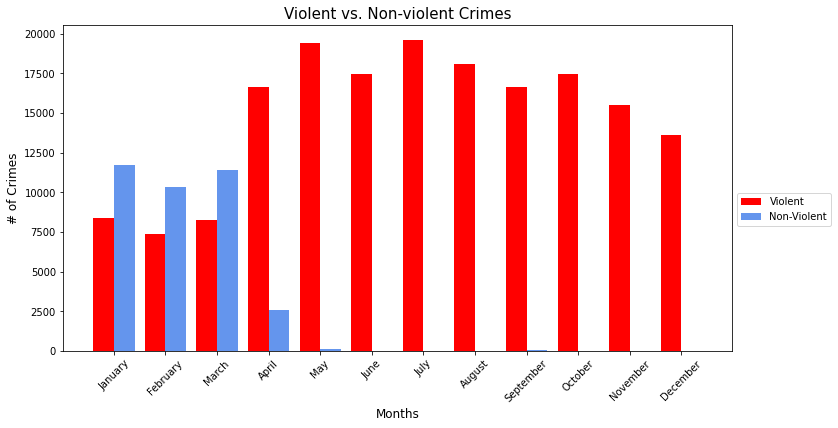

In [6]:
#lists of data and labels 
non_violent = [11696, 10301, 11401, 2578, 143, 0, 0, 0, 47, 0, 0, 5]
violent = [8376, 7367, 8262,  16602, 19400,17436,19568,  18070, 16601, 17455,  15528,  13622 ]
x = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
x_axis = np.arange(len(x))

#create grouped bar chart
plt.bar(x_axis - 0.2, violent, 0.4, label = 'Violent', color = 'red')
plt.bar(x_axis + 0.2, non_violent, 0.4, label = 'Non-Violent', color = 'cornflowerblue')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], x, rotation = 45)

#formatting
plt.legend(bbox_to_anchor =(1, 0.5))
plt.xlabel('Months', fontsize = 12)
plt.ylabel('# of Crimes', fontsize = 12)
plt.title('Violent vs. Non-violent Crimes', fontsize = 15)
plt.gcf().set_size_inches(12,6)
plt.gcf().set_facecolor('white')


plt.savefig('vio-non.png', bbox_inches="tight")
plt.show()

# GRAPHIC 5 -- Crime Rate per Month
Line graph shows the fluctuations in crime rates per month. Crime rates are significantly higher in January as well as the warmer month of July. Despite the fluctuations in the seasons, we can see that crime rates are always increasing during warmer months. 

Graph depicts data on y axis with 0 as the baseline. 

In [10]:
#find # of crimes committed per month
crime_data = pd.read_csv("NYPD_ARRESTS_FINAL.csv")
crime_data['month'] = pd.DatetimeIndex(crime_data['datetime']).month
stats = [] 
for x in range(1,13):
    stats.append((crime_data['month'] == x).sum())
stats_final = []
for s in stats:
    stats_final.append(float(s))
#print(stats_final)

population = 8419000
crime_rates = [] 
for each in stats_final:
    crime_rate = format((each/population)*100000,'.2f')
    crime_rates.append(float(crime_rate))
    
print(crime_rates)

[238.64, 210.14, 233.66, 228.02, 232.25, 207.2, 232.53, 214.79, 197.84, 207.49, 184.65, 161.98]


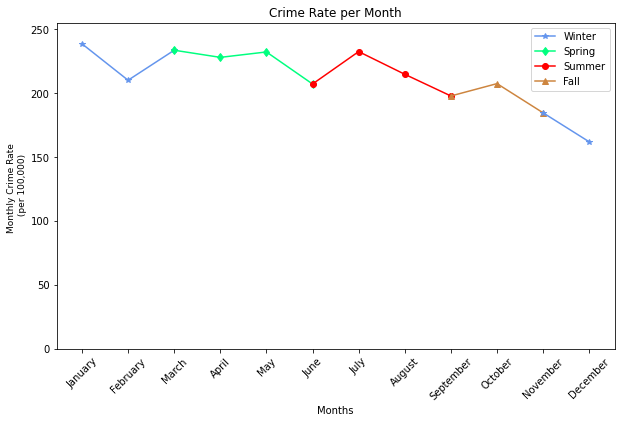

In [7]:
#x values - months of the year
x = ['January', 'February', 'March']
y = ['March', 'April', 'May', 'June']
z= ['June', 'July', 'August', 'September']
d = ["November", 'December']
a= ['September', 'October', 'November'] 

#y values -- crimes rate per month
jf = [238.64, 210.14, 233.6]
mm = [233.6,228.02, 232.25, 207.2]
ja = [207.2, 232.53, 214.79, 197.84]
sn = [197.84, 207.49, 184.65]
nd = [184.65, 161.98]


#create line graph
plt.plot(x, jf,marker = "*", color = 'cornflowerblue')
plt.plot(y, mm, marker = "d", color = 'springgreen')
plt.plot(z, ja, marker = "o", color= 'red')
plt.plot(a, sn, marker = '^', color = 'peru')
plt.plot(d, nd, marker = '*', color = 'cornflowerblue')

#formatting
plt.xlabel('Months')
plt.ylabel("Monthly Crime Rate \n (per 100,000)", fontsize = 9)
plt.xticks(rotation = '45')
plt.title("Crime Rate per Month")
plt.ylim([0,255])
plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches(10,6)
plt.legend(["Winter", 'Spring', 'Summer', 'Fall'])

plt.savefig('crime rate.png', bbox_inches="tight")
plt.show()

# GRAPHIC 6 -- Crime Rate per Month (zoomed)
This graph is the same as the previous graph (#5). 

Line graph shows the fluctuations in crime rates per month. Crime rates are significantly higher in January as well as the warmer month of July. Despite the fluctuations in the seasons, we can see that crime rates are always increasing during warmer months. 

Graph depicts data on y axis with 150 as the beginning y axis value to zoom in on the graph and better show the fluctuations in data.

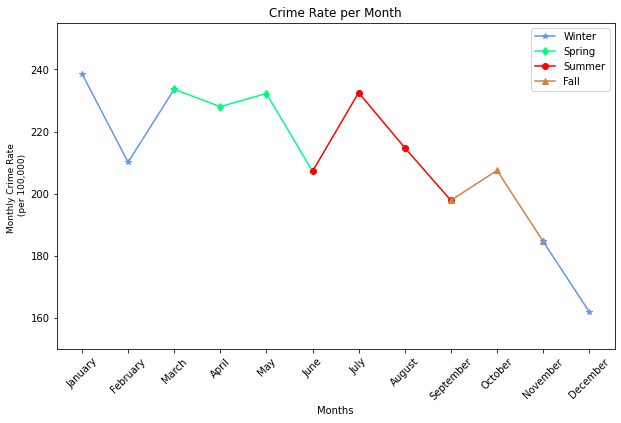

In [8]:
#x values - months of the year
x = ['January', 'February', 'March']
y = ['March', 'April', 'May', 'June']
z= ['June', 'July', 'August', 'September']
d = ["November", 'December']
a= ['September', 'October', 'November'] 

#y values -- crimes rate per month
jf = [238.64, 210.14, 233.6]
mm = [233.6,228.02, 232.25, 207.2]
ja = [207.2, 232.53, 214.79, 197.84]
sn = [197.84, 207.49, 184.65]
nd = [184.65, 161.98]


#create line graph
plt.plot(x, jf,marker = "*", color = 'cornflowerblue')
plt.plot(y, mm, marker = "d", color = 'springgreen')
plt.plot(z, ja, marker = "o", color= 'red')
plt.plot(a, sn, marker = '^', color = 'peru')
plt.plot(d, nd, marker = '*', color = 'cornflowerblue')

#formatting
plt.xlabel('Months')
plt.ylabel("Monthly Crime Rate \n (per 100,000)", fontsize = 9)
plt.xticks(rotation = '45')
plt.title("Crime Rate per Month")
plt.ylim([150,255])
plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches(10,6)
plt.legend(["Winter", 'Spring', 'Summer', 'Fall'])

plt.savefig('crime rate zoomed.png', bbox_inches="tight")
plt.show()

# GRAPHIC 7 -- Combined Crime Rate and Average Temperature per Month
Subplot shows a comparison between the average temperatures per month as well as the average crime rate per month. We can see that when the temperature is increasing from June to August, the crime rates increase in response. They mirror each other. 

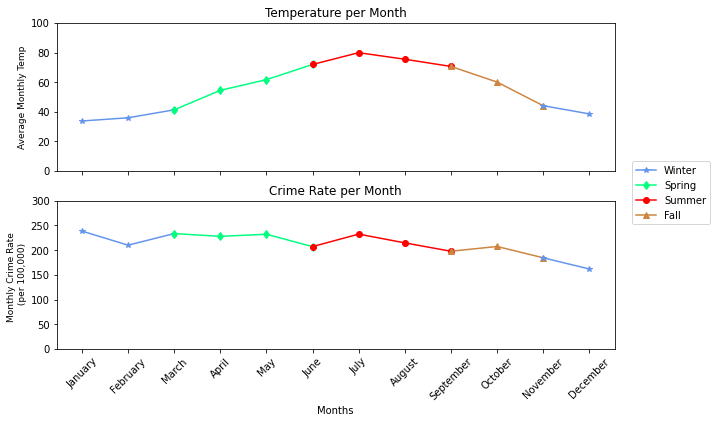

In [9]:
#month labels for x axis
x = ['January', 'February', 'March']
y = ['March', 'April', 'May', 'June']
z= ['June', 'July', 'August', 'September']
d = ["November", 'December']
a= ['September', 'October', 'November'] 

#avg temperatures per season
jan_feb_temp = [33.81, 35.98, 41.33]
mar_may_temp = [41.33, 54.47, 61.69, 71.93]
jun_aug_temp = [71.93, 79.88, 75.46, 70.61]
sep_nov_temp = [70.61, 60.07, 44.13]
nov_dec_temp = [44.13, 38.61]

#avg crime rates per season
jan_feb_crime = [238.64, 210.14, 233.6]
mar_may_crime = [233.6,228.02, 232.25, 207.2]
jun_aug_crime = [207.2, 232.53, 214.79, 197.84]
sep_nov_crime = [197.84, 207.49, 184.65]
nov_dec_crime = [184.65, 161.98]

#creating the subplot
fig, (ax1, ax2) = plt.subplots(2, sharex = 'all')
#avg temperature plot
ax1.plot(x, jan_feb_temp, marker = "*", color = 'cornflowerblue')
ax1.plot(y, mar_may_temp, marker = "d", color = 'springgreen')
ax1.plot(z, jun_aug_temp, marker = "o", color= 'red')
ax1.plot(a, sep_nov_temp, marker = '^', color = 'peru')
ax1.plot(d, nov_dec_temp, marker = '*', color = 'cornflowerblue')
#avg crime rate plot
ax2.plot(x, jan_feb_crime,marker = "*", color = 'cornflowerblue')
ax2.plot(y, mar_may_crime, marker = "d", color = 'springgreen')
ax2.plot(z, jun_aug_crime, marker = "o", color= 'red')
ax2.plot(a, sep_nov_crime, marker = '^', color = 'peru')
ax2.plot(d, nov_dec_crime, marker = '*', color = 'cornflowerblue')

#formatting
plt.xlabel('Months')
ax2.set_ylabel("Monthly Crime Rate \n (per 100,000)", fontsize = 9)
ax1.set_ylabel("Average Monthly Temp", fontsize = 9)
plt.xticks(rotation = '45')
ax1.set_title("Temperature per Month")
ax2.set_title("Crime Rate per Month")
ax1.set_ylim([0,100])
ax2.set_ylim([0,300])
plt.legend(["Winter", 'Spring', 'Summer', 'Fall'], bbox_to_anchor =(1.18, 1.3))
plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches(10,6)


plt.savefig('subplot.png', bbox_inches="tight")
plt.show()

# GRAPHIC 8 -- Temperature vs. Crime Rate
The density map shows more crimes are concentrated in the higher temperatures. 

Graph depicts data on y axis with 0 as the baseline. 

In [36]:
#create list with rate of offenses by month
crime['month'] = pd.DatetimeIndex(crime['datetime']).month
stats = [] 
for x in range(1,13):
    stats.append((crime_data['month'] == x).sum())
print(stats)

[20091, 17692, 19672, 19197, 19553, 17444, 19577, 18083, 16656, 17469, 15546, 13637]


In [37]:
#convert previous cell results into floats for further processing
stats_final = []
for s in stats:
    stats_final.append(float(s))
print(stats_final)

[20091.0, 17692.0, 19672.0, 19197.0, 19553.0, 17444.0, 19577.0, 18083.0, 16656.0, 17469.0, 15546.0, 13637.0]


In [38]:
#adjust floats with expected population to obtain crime rate
population = 8419000
crimes = [] 
for each in stats_final:
    crime_rate = format((each/population)*100000,'.2f')
    crimes.append(float(crime_rate))

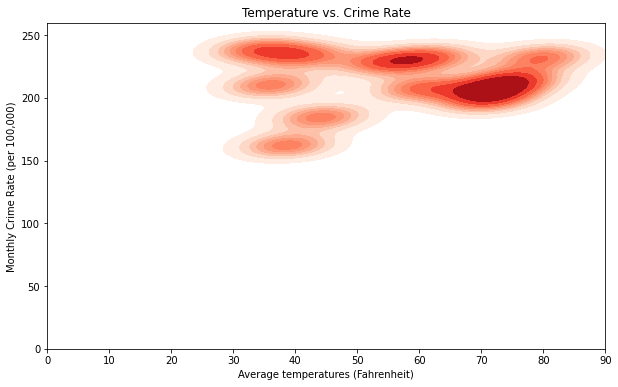

In [39]:
#creating visual
sns.kdeplot(x=averages, y=crimes, cmap="Reds", shade=True, bw_adjust=.5)
#formatting
plt.ylim([0,260])
plt.xlim([0,90])
plt.xlabel('Average temperatures (Fahrenheit)')
plt.ylabel('Monthly Crime Rate (per 100,000)')
plt.title('Temperature vs. Crime Rate')
plt.gcf().set_size_inches(10,6)
plt.show()

# GRAPHIC 9 -- Temperature vs. Crime Rate (zoomed)

This graph is the same as the previous graph displayed (#8).

The density map shows more crimes are concentrated in the higher temperatures. 

Graph depicts data on y axis with 139,000 as the beginning y axis value to zoom in on the graph and better show granularity of the data.

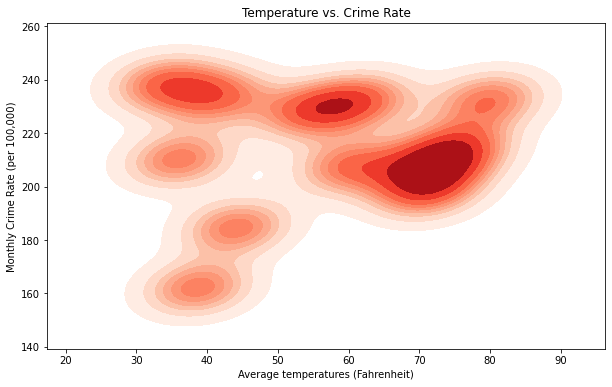

In [40]:
#creating visual
sns.kdeplot(x=averages, y=crimes, cmap="Reds", shade=True, bw_adjust=.5)
#formatting
plt.xlabel('Average temperatures (Fahrenheit)')
plt.ylabel('Monthly Crime Rate (per 100,000)')
plt.title('Temperature vs. Crime Rate')
plt.gcf().set_size_inches(10,6)
plt.show()